## **TASK-5. Exploratory Data Analysis Of Indian Premier League(2008-2019)** 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt # data visualisation
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ipl-data-set/matches.csv
/kaggle/input/ipl-data-set/teamwise_home_and_away.csv
/kaggle/input/ipl-data-set/deliveries.csv
/kaggle/input/ipl-data-set/most_runs_average_strikerate.csv
/kaggle/input/ipl-data-set/teams.csv
/kaggle/input/ipl-data-set/Players.xlsx


### Analysis Of Matches Dataset

In [2]:
matches_df=pd.read_csv('/kaggle/input/ipl-data-set/matches.csv')
matches_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
matches_df.shape

(756, 18)

Matches dataset has 756 rows and 18 columns

### Number of teams in all seasons:

In [4]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

#### Since there are two Rising Pune Supergiants (one without s in end) we can replace *supergiant* with *supergiants*
#### And Delhi Daredevils are now Delhi Capitals So we Have to replace that also

In [7]:
matches_df.replace('Rising Pune Supergiant','Rising Pune Supergiants',inplace=True)
matches_df.replace('Delhi Daredevils','Delhi Capitals',inplace=True)

In [8]:
matches_df['umpire3'].isna().sum()

637

Since 637 values of 3rd umpire are misiing we will drop the 'umpire3' column

In [9]:
matches_df.drop('umpire3',axis=1,inplace=True)

### Number Of different Venues:

In [11]:
matches_df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

### Which city has how many matches?

In [13]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 14

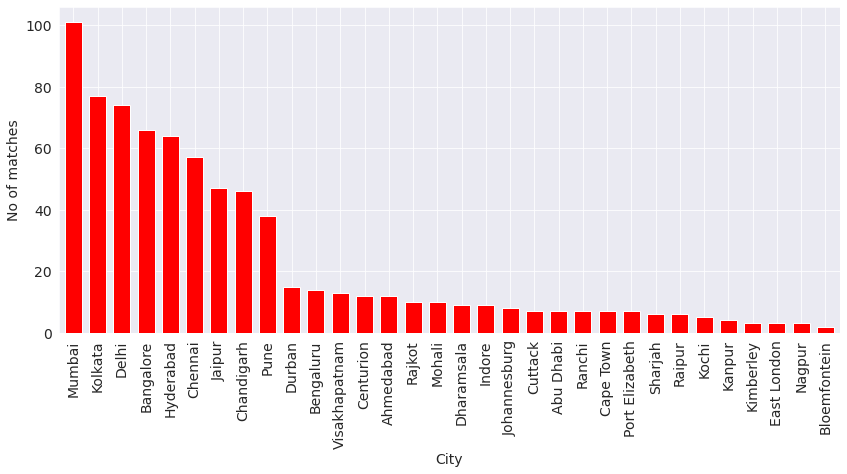

In [14]:
plt.figure(figsize=(14,6))
matches_df['city'].value_counts().plot.bar(width=0.7,color='red')
plt.xlabel('City')
plt.ylabel('No of matches')
plt.show()

### Which venue has how many matches?

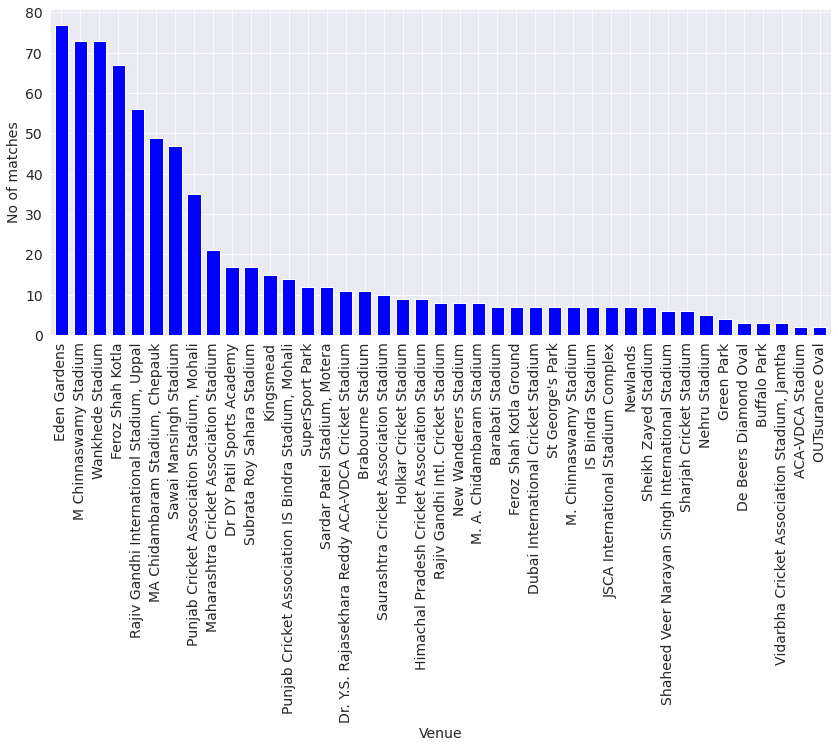

In [15]:
plt.figure(figsize=(14,6))
matches_df['venue'].value_counts().plot.bar(width=0.7,color='blue')
plt.xlabel('Venue')
plt.ylabel('No of matches')
plt.show()

#### Eden Gardens has hosted most of the matches

### Which Team has won most matches?

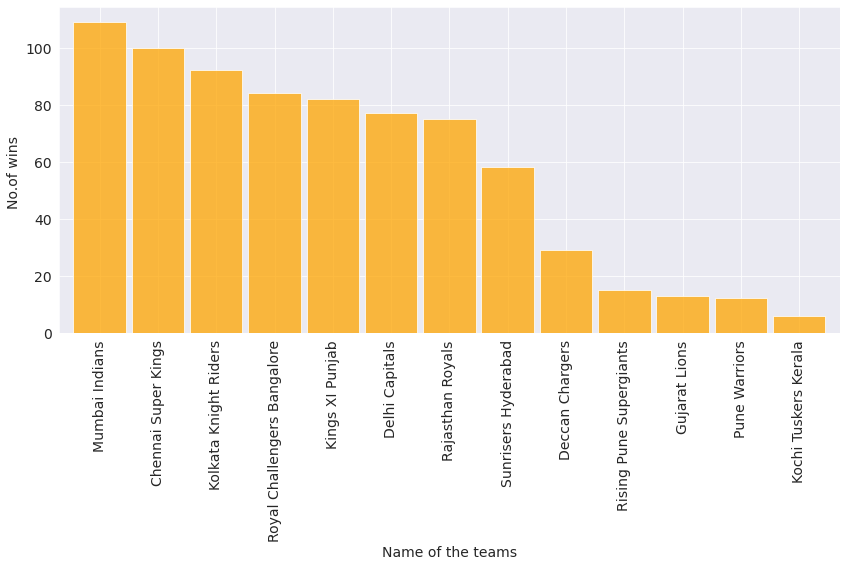

In [17]:
plt.figure(figsize=(14,6))
matches_df['winner'].value_counts().plot.bar(width=0.9,color="orange",alpha=0.75)
plt.xlabel("Name of the teams")
plt.ylabel("No.of wins ")
plt.show()

#### Mumbai Indians has won most of the matches

### What do teams choose after winning toss?

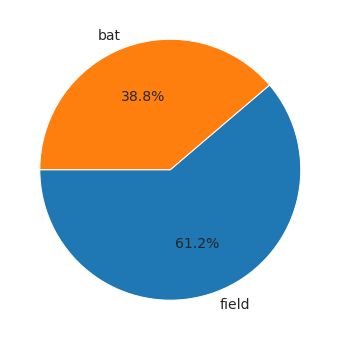

In [18]:
plt.figure(figsize=(14,6))
plt.pie(matches_df['toss_decision'].value_counts(), labels=matches_df['toss_decision'].value_counts().index, autopct='%1.1f%%', startangle=180)
plt.show()

#### Most of the teams like to field after winning toss.

### Who was awarded man of match for most number of times?

In [19]:
pom=matches_df.groupby('player_of_match')['player_of_match'].count()
pom_df=pd.DataFrame(pom)

In [20]:
pom_df.rename(columns={'player_of_match':'Number of ManOfMatch'},inplace=True)
pom_df.sort_values('Number of ManOfMatch',ascending=False)

,Number of ManOfMatch
player_of_match,
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
DA Warner,17
RG Sharma,17
...,...
KMDN Kulasekara,1
KK Cooper,1
K Rabada,1


#### Chris Gayle has been awarded 21 times Man of Match award

### Analysis Of Players Dataset

In [21]:
players_df=pd.read_excel('../input/ipl-data-set/Players.xlsx')
players_df

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN
...,...,...,...,...,...
561,Younis Khan,1977-11-29,Right_Hand,Right-arm medium,Pakistan
562,YS Chahal,1990-07-23,Right_Hand,Legbreak googly,India
563,Yuvraj Singh,1981-12-12,Left_Hand,Slow left-arm orthodox,India
564,YV Takawale,1984-11-05,Right_Hand,NaN,India


In [22]:
players_df.shape

(566, 5)

#### Total 565 players have participated in all seasons of IPL

### Number of players from each Country

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

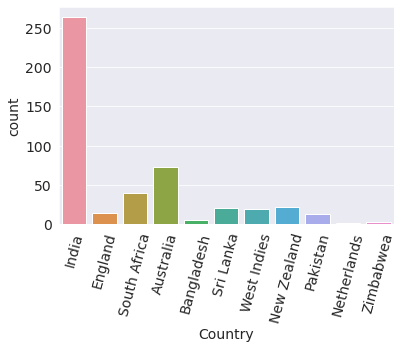

In [24]:
sns.countplot(players_df['Country'])
plt.xticks(rotation=75)

### Variaties of players

In [25]:
players_df['Bowling_Skill'].unique()

array(['Right-arm medium', 'Right-arm offbreak', 'Left-arm fast-medium',
       'Right-arm fast-medium', nan, 'Right-arm fast', 'Legbreak googly',
       'Legbreak', 'Left-arm medium-fast', 'Slow left-arm orthodox',
       'Right-arm medium-fast', 'Left-arm medium', 'Left-arm fast',
       'Slow left-arm chinaman', 'Right-arm bowler', 'Right-arm Medium',
       'Right-arm Fast'], dtype=object)

### Analysis of teams home and away matches 

In [26]:
home_away_df=pd.read_csv('../input/ipl-data-set/teamwise_home_and_away.csv')
home_away_df

,team,home_wins,away_wins,home_matches,away_matches,home_win_percentage,away_win_percentage
0,Rising Pune Supergiant,5,5,8,8,62.500000,62.500000
1,Mumbai Indians,58,51,101,86,57.425743,59.302326
2,Chennai Super Kings,51,49,89,75,57.303371,65.333333
3,Delhi Capitals,3,7,6,10,50.000000,70.000000
4,Sunrisers Hyderabad,30,28,63,45,47.619048,62.222222
5,Rajasthan Royals,29,46,67,80,43.283582,57.500000
6,Deccan Chargers,18,11,43,32,41.860465,34.375000
7,Kings XI Punjab,38,44,91,85,41.758242,51.764706
8,Royal Challengers Bangalore,35,49,85,95,41.176471,51.578947
9,Kolkata Knight Riders,34,58,83,95,40.963855,61.052632


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 <a list of 14 Text major ticklabel objects>)

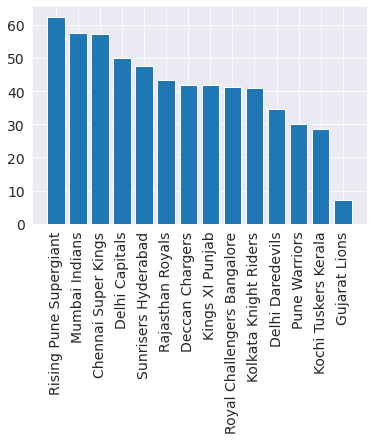

In [27]:
plt.bar(home_away_df.team,home_away_df.home_win_percentage)
plt.xticks(rotation=90)

### Analysis Of Batsmans

In [28]:
bat_df=pd.read_csv('../input/ipl-data-set/most_runs_average_strikerate.csv')
bat_df

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
...,...,...,...,...,...,...
511,ND Doshi,0,1,13,0.000000,0.000000
512,J Denly,0,1,1,0.000000,0.000000
513,S Ladda,0,2,9,0.000000,0.000000
514,V Pratap Singh,0,1,1,0.000000,0.000000


### Who is the highest run scorer of all seasons?

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

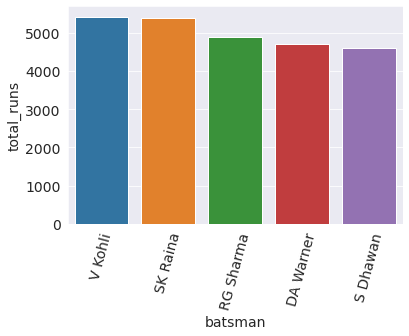

In [30]:
sns.barplot('batsman', 'total_runs', data=bat_df.head(5))
plt.xticks(rotation=75)

#### Virat Kohli has scored highest 5426 runs.

### Which batsman has highest strike rate?

In [31]:
bat_df[bat_df.total_runs>1000] #should have scored more than 1000 runs 

,batsman,total_runs,out,numberofballs,average,strikerate
0,V Kohli,5426,152,4111,35.697368,131.987351
1,SK Raina,5386,160,3916,33.662500,137.538304
2,RG Sharma,4902,161,3742,30.447205,130.999466
3,DA Warner,4717,114,3292,41.377193,143.286756
4,S Dhawan,4601,137,3665,33.583942,125.538881
...,...,...,...,...,...,...
64,HH Pandya,1082,38,689,28.473684,157.039187
65,LMP Simmons,1079,27,851,39.962963,126.792009
66,LRPL Taylor,1017,41,818,24.804878,124.327628
67,M Vohra,1013,42,767,24.119048,132.073012


(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

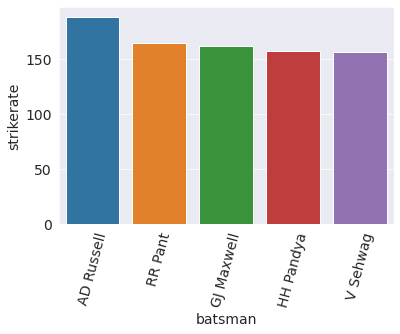

In [32]:
sns.barplot('batsman', 'strikerate', data=bat_df[bat_df.total_runs>1000].sort_values('strikerate',ascending=False).head(5))
plt.xticks(rotation=75)

#### Andre Russell has the highest strike rate

### Analysis of Deliveries Dataset

In [34]:
del_df=pd.read_csv('../input/ipl-data-set/deliveries.csv')
del_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


So this dataset has information about every ball bowled in all the matches till now.

In [40]:
df1=del_df[del_df['match_id']==1]
df1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,6,YS Chahal,A Choudhary,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
244,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,1,YS Chahal,A Choudhary,BCJ Cutting,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
245,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,YS Chahal,A Choudhary,BCJ Cutting,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
246,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,A Choudhary,YS Chahal,BCJ Cutting,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [42]:
srh=df1[df1['inning']==1]
srh['batsman_runs'].value_counts()

1    57
0    32
4    17
6     9
2     9
3     1
Name: batsman_runs, dtype: int64

The above is the distribution of runs scored by srh in match 1

In [43]:
srh['dismissal_kind'].value_counts()

caught    3
bowled    1
Name: dismissal_kind, dtype: int64

In [44]:
rcb=df1[df1['inning']==2]
rcb['batsman_runs'].value_counts()

0    49
1    44
4    15
6     8
2     7
Name: batsman_runs, dtype: int64

The above is the distribution of runs scored by rcb in match 1

In [ ]:
rcb['dismissal_kind'].value_counts()

## So this was the exploratory data analyis of IPL dataset from 2008-2019.Hope this has helped you to get know about interesting sights of 13 seasons of IPL.